<a href="https://colab.research.google.com/github/Ojas-Shukla/Heart-Disease-Prediction/blob/main/HeartDiseasePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/heart.csv')

In [5]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.shape

(303, 14)

In [8]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [9]:
df.duplicated().sum()

np.int64(1)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(302, 14)

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


##**Outlier Analysis**

In [13]:
import plotly.express as px

In [14]:
for i in df.columns:
  if df[i].dtype != 'object':
    bp = px.box(df[i], title = f'Boxplot of {i}')
    bp.show()


In [15]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [16]:
outcol = ['trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'thal']

In [17]:
for x in outcol:
  q1 = df[x].quantile(0.25)
  q3 = df[x].quantile(0.75)

In [18]:
df.shape

(302, 14)

##**Scaling**

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()
x = df.drop('target', axis=1)
y = df['target']
x_scaled = scaler.fit_transform(x)

**Logistic Regression**

In [21]:
x = df.drop('target', axis=1)
y = df['target']

In [22]:
x.shape

(302, 13)

In [23]:
y.shape

(302,)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
(x_train, x_test, y_train, y_test) = train_test_split(x, y, test_size=0.2, random_state = 42)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(max_iter=1000)

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic_regression', LogisticRegression(max_iter=1000))
])

para_grid = {
    'logistic_regression__C': [0.01, 0.1, 1, 10],
    'logistic_regression__penalty': ['l1', 'l2'],
    'logistic_regression__solver': ['liblinear', 'saga']
}

grid = GridSearchCV(pipeline, param_grid=para_grid, cv=5, scoring='accuracy')
grid.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic_regression',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'logistic_regression__C': [0.01, 0.1, 1, 10],
                         'logistic_regression__penalty': ['l1', 'l2'],
                         'logistic_regression__solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [30]:
y_pred = grid.best_estimator_.predict(x_test)

In [31]:
y_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1])

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [33]:
accuracy_score(y_test, y_pred)

0.8360655737704918

In [34]:
confusion_matrix(y_test, y_pred)

array([[25,  4],
       [ 6, 26]])

In [35]:
roc_auc_score(y_test, y_pred)

np.float64(0.8372844827586207)

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



##**EDA**

In [37]:
df.target.value_counts(normalize = True)

,proportion
target,
1,0.543046
0,0.456954


<Axes: xlabel='target', ylabel='count'>

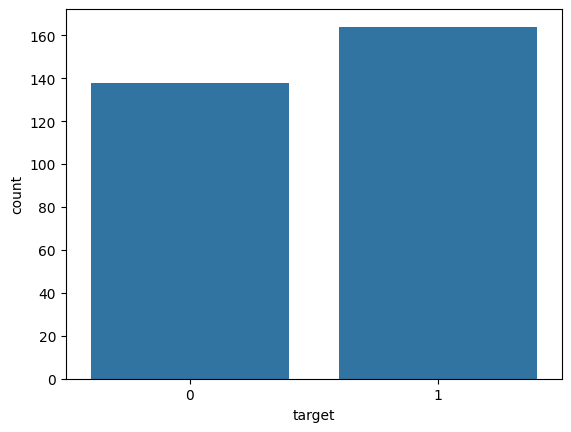

In [38]:
sns.countplot(x = 'target', data = df)

<Axes: xlabel='age', ylabel='Density'>

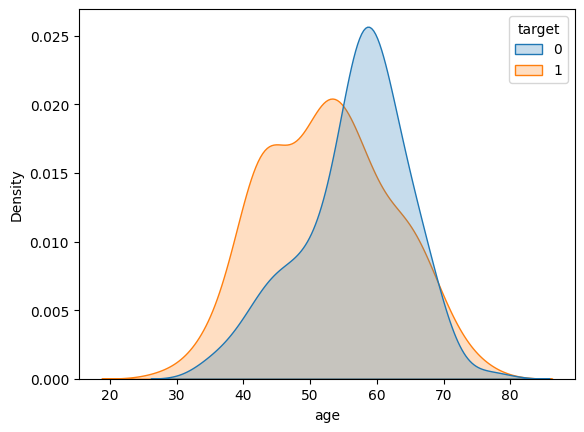

In [39]:
sns.kdeplot(x = 'age', hue = 'target', data = df, fill = True)

<Axes: xlabel='trestbps', ylabel='Density'>

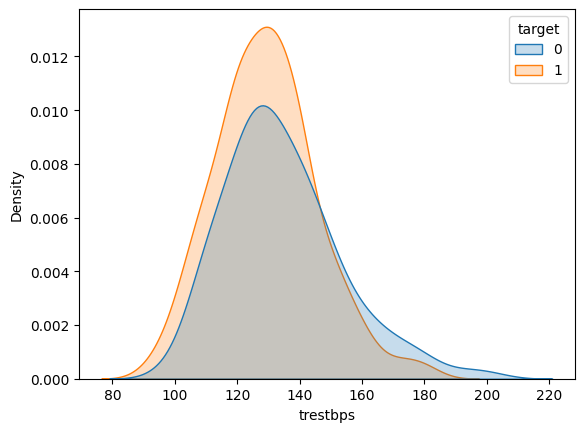

In [40]:
sns.kdeplot(x = 'trestbps', hue = 'target', data = df, fill = True)

* a lot patients have heart disease having trestbps between 120-140
* at high trestbps there are less chance of heart disease

<Axes: xlabel='chol', ylabel='Density'>

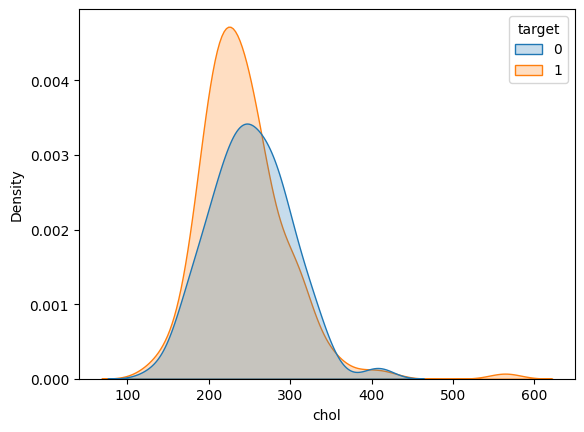

In [41]:
sns.kdeplot(data = df, x = 'chol', hue = 'target', fill = True)

* a lot of customer are facing heart disease having chol between 200-300

<Axes: xlabel='thalach', ylabel='Density'>

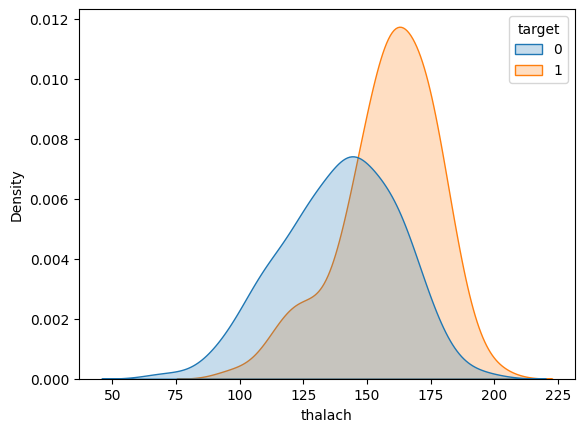

In [42]:
sns.kdeplot(data = df, x = 'thalach', hue = 'target', fill = True)

* between 150-200 thalach there are more chances of heart disease
* at lower thalach customers are fit

<Axes: xlabel='oldpeak', ylabel='Density'>

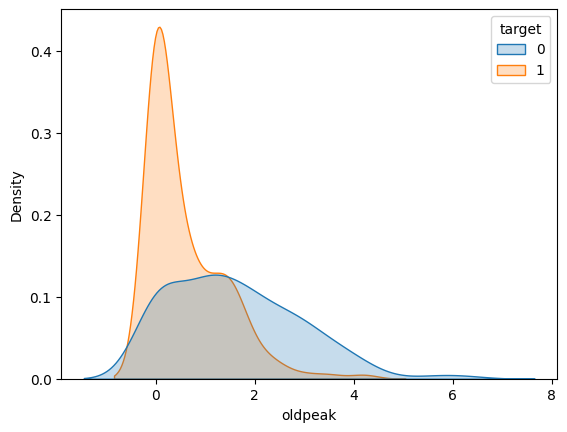

In [43]:
sns.kdeplot(data = df, x = 'oldpeak', hue = 'target', fill = True)

In [44]:
df.sex.value_counts(normalize = True)

,proportion
sex,
1,0.682119
0,0.317881


<Axes: xlabel='sex', ylabel='count'>

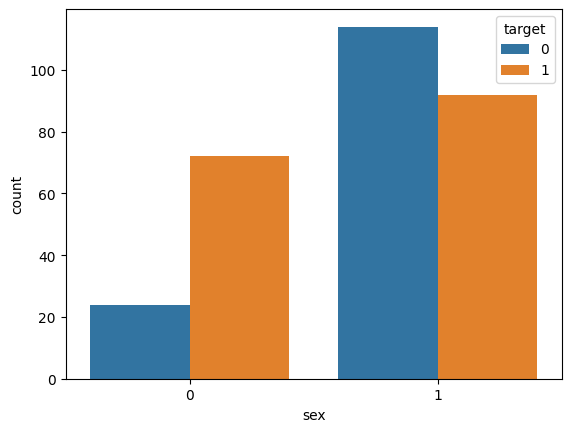

In [45]:
sns.countplot(data = df, x = 'sex', hue = 'target')

<Axes: >

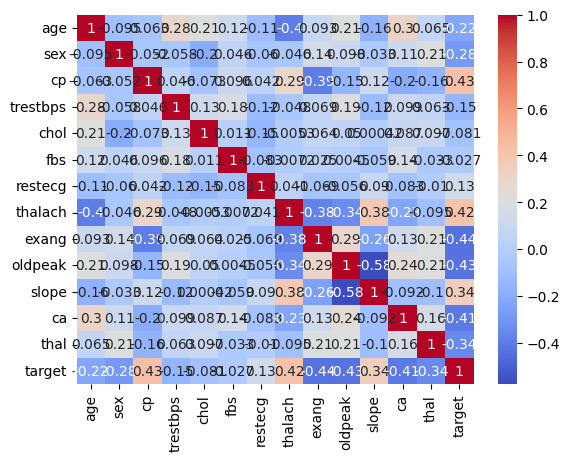

In [46]:
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

#**Decision Tree Model**

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
dt = DecisionTreeClassifier(random_state = 42)

In [49]:
para_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_dt = GridSearchCV(dt, param_grid=para_grid_dt, cv=5, scoring='accuracy')
grid_dt.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [50]:
y_pred_dt = grid_dt.best_estimator_.predict(x_test)

In [51]:
y_pred_dt

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0])

In [52]:
accuracy_score(y_test, y_pred_dt)

0.7704918032786885

In [53]:
roc_auc_score(y_test, y_pred_dt)

np.float64(0.7747844827586207)

#**Random Forest Model**

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rf = RandomForestClassifier(random_state = 42)

In [56]:
para_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_rf = GridSearchCV(rf, param_grid=para_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [57]:
y_pred_rf = grid_rf.best_estimator_.predict(x_test)

In [58]:
y_pred_rf

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [59]:
accuracy_score(y_test, y_pred_rf)

0.8852459016393442

In [60]:
roc_auc_score(y_test, y_pred_rf)

np.float64(0.8857758620689655)

#**Best Model is Random Forest**

In [61]:
best_model = grid_rf.best_estimator_

In [63]:
import joblib

In [64]:
model_path = 'heart_disease_model.joblib'
joblib.dump(best_model, model_path)

['heart_disease_model.joblib']